In [2]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Import .csv file and convert it to a DataFrame object
df = pd.read_csv("/content/Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [7]:
import pandas as pd

# Verificar si hay valores nulos en el DataFrame
if df.isnull().any().any():
    print("Hay valores nulos en el DataFrame.")
else:
    print("No hay valores nulos en el DataFrame.")


No hay valores nulos en el DataFrame.


In [8]:
import pandas as pd

# Suponiendo que df es tu DataFrame y deseas eliminar las columnas CustomerID y Genre
df = df.drop(['CustomerID', 'Genre'], axis=1)


## Medir bien las distancias

Como tenemos datos numéricos y categóricos hay que crear un métodod de distancia de Gower para ajustar bien.

In [9]:
# Paso 1: Selecciona solo las características numéricas
numeric_features = df.select_dtypes(include=['float64', 'int64'])

# Paso 2: Normaliza las características numéricas
scaler = StandardScaler()
scaled_numeric = scaler.fit_transform(numeric_features)
scaled_numeric_df = pd.DataFrame(scaled_numeric, columns=numeric_features.columns)


In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Supongamos que df es tu DataFrame con las características normalizadas
X = df.values  # Convierte el DataFrame a un array numpy

# Normaliza tus datos si no lo has hecho previamente
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Calcula los k vecinos más cercanos
k = 8
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(X)
distances, indices = neigh.kneighbors(X)

# Calcula la distancia promedio al k-ésimo vecino más cercano para cada punto
eps = distances[:, -1].mean()

# Imprime el valor de eps
print("Valor de eps:", eps)


Valor de eps: 0.6576311169471597


In [14]:
import numpy as np

# Suponiendo que distances contiene las distancias calculadas por NearestNeighbors

# Ordenar las distancias de menor a mayor a lo largo del eje de las muestras
sorted_distances = np.sort(distances, axis=1)

# Realizar la media de cada muestra
mean_distances = np.mean(sorted_distances, axis=1)


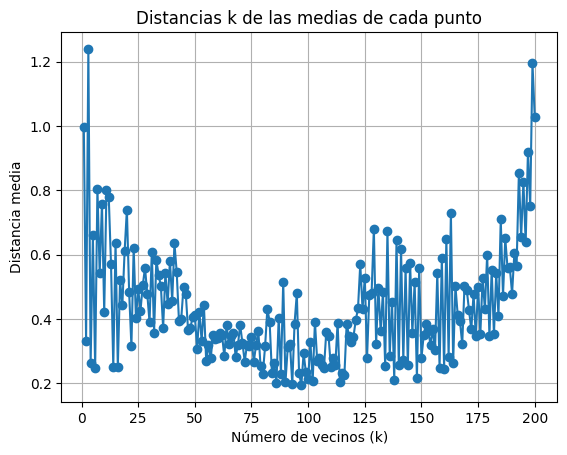

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que mean_distances contiene las medias de las distancias de cada punto

# Definir el rango de valores k
k_values = np.arange(1, len(mean_distances) + 1)

# Graficar las distancias k de las medias de cada punto
plt.plot(k_values, mean_distances, marker='o', linestyle='-')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Distancia media')
plt.title('Distancias k de las medias de cada punto')
plt.grid(True)
plt.show()


In [16]:
from sklearn.cluster import DBSCAN

# Definir el valor de eps basado en la gráfica anterior
eps = 0.6 # Reemplaza 'valor_elegido' con el valor que elijas de la gráfica

# Entrenar DBSCAN con el valor de eps elegido
dbscan = DBSCAN(eps=eps, min_samples=k)  # k es el número de vecinos usado anteriormente
dbscan.fit(X)


DBSCAN(eps=0.6, min_samples=8)

In [17]:
from sklearn.metrics import silhouette_score

# Suponiendo que tienes tus datos X y que ya has entrenado tu modelo DBSCAN llamado dbscan

# Calcula el coeficiente de Silhouette
silhouette_coefficient = silhouette_score(X, dbscan.labels_)

print("Coeficiente de Silhouette:", silhouette_coefficient)


Coeficiente de Silhouette: 0.2526490136739835


In [ ]:
# ¿Qué indican las muestras -1?
dbscan.labels_

In [18]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [19]:
cluster_counts = cl['cluster'].value_counts()
print(cluster_counts)


cluster
-1    52
 1    52
 0    50
 2    34
 3    12
Name: count, dtype: int64


In [20]:
# Suponiendo que df es tu DataFrame original y cl es el DataFrame que contiene las etiquetas de clúster
concatenated_df = pd.concat([df, cl], axis=1)


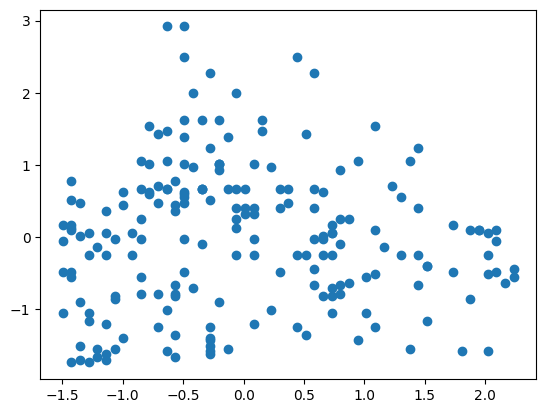

In [21]:
plt.scatter(X[:,0], X[:,1])

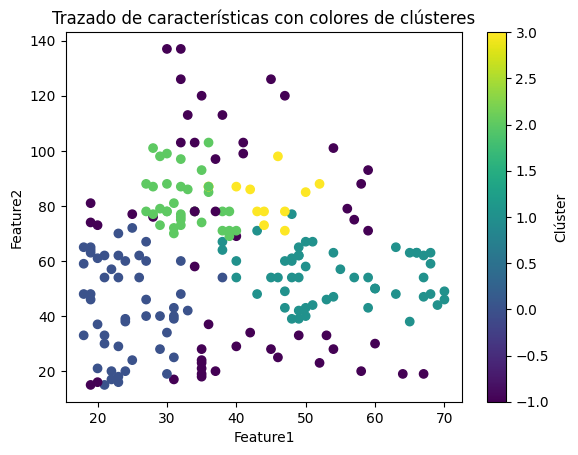

In [23]:
import matplotlib.pyplot as plt

# Suponiendo que tienes dos características en tu DataFrame df llamadas 'Feature1' y 'Feature2'
# y las etiquetas de clúster en la columna 'cluster' del DataFrame concatenado

# Trazar las dos primeras características con los colores de las etiquetas de los clústeres
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=concatenated_df['cluster'], cmap='viridis')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Trazado de características con colores de clústeres')
plt.colorbar(label='Clúster')
plt.show()


In [25]:
concatenated_df.head()

,Age,Annual Income (k$),Spending Score (1-100),cluster
0,19,15,39,-1
1,21,15,81,0
2,20,16,6,-1
3,23,16,77,0
4,31,17,40,-1


In [26]:
cluster_dataframes = {}  # Diccionario para almacenar los DataFrames de cada clúster

# Iterar sobre cada clúster único en las etiquetas de clúster
for cluster_label in concatenated_df['cluster'].unique():
    # Filtrar las filas correspondientes a este clúster
    cluster_df = concatenated_df[concatenated_df['cluster'] == cluster_label]
    # Almacenar este DataFrame en el diccionario con el nombre del clúster como clave
    cluster_dataframes[cluster_label] = cluster_df

# Ahora cluster_dataframes contiene un DataFrame por cada clúster
# Puedes acceder a los DataFrames individuales utilizando las etiquetas de clúster como clave


# Análisis de los clúster